Import packages

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('remotemotivation2.csv', delimiter=';')

In [3]:
df.columns

Index(['CASE', 'MO01', 'MO02', 'MO03', 'MO04', 'MO05', 'MO06', 'MO07', 'MO08',
       'MO09', 'MO10', 'MO11', 'MO12', 'MO13', 'MO14', 'MO15', 'MO16', 'MO17',
       'Geschlecht', 'Anstellung', 'Sanstell', 'Bdauer', 'Branche',
       'Arbeitsstunden', 'Zeitmodell', 'Smodell', 'SD09', 'SD11', 'SD07',
       'SD10', 'SD08', 'SD08_01', 'SD08_02', 'SD08_03', 'SD08_06', 'SD08_05',
       'SD13', 'SD15', 'SD15_01', 'SD15_02', 'SD15_03', 'SD15_04', 'SD15_05',
       'SD15_07', 'SD15_06', 'SD15_06a', 'SD16', 'SD16_01', 'SD16_02',
       'SD16_03', 'SD16_04', 'SD16_05', 'SD16_07', 'SD16_06', 'SD16_06a',
       'Alter', 'SD18', 'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05',
       'SD18_07', 'SD18_06', 'SD18_06a', 'SD19', 'SD19_01', 'SD19_02',
       'SD19_03', 'SD19_04', 'SD19_05', 'SD19_07', 'SD19_06', 'SD19_06a',
       'TIME_RSI', 'DEG_TIME'],
      dtype='object')

In [4]:
# Entferne alten Index 'CASE'
df.drop('CASE', axis=1, inplace=True)

In [5]:
# Erster Überblick über die Daten
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MO01            177 non-null    int64 
 1   MO02            177 non-null    int64 
 2   MO03            177 non-null    int64 
 3   MO04            177 non-null    int64 
 4   MO05            177 non-null    int64 
 5   MO06            177 non-null    int64 
 6   MO07            177 non-null    int64 
 7   MO08            177 non-null    int64 
 8   MO09            177 non-null    int64 
 9   MO10            177 non-null    int64 
 10  MO11            177 non-null    int64 
 11  MO12            177 non-null    int64 
 12  MO13            177 non-null    int64 
 13  MO14            177 non-null    int64 
 14  MO15            177 non-null    int64 
 15  MO16            177 non-null    int64 
 16  MO17            177 non-null    int64 
 17  Geschlecht      177 non-null    int64 
 18  Anstellung

In [6]:
# Entferne Spalten mit zu vielen NaN (fehlende Werte)
df.drop(['Sanstell','Smodell','SD15_06a','SD16_06a','SD18_06a','SD19_06a'], axis=1, inplace=True)

In [7]:
# In Absprache mit meiner Dozentin werden folgende Items als Subset zusammengefasst: 

# MO01 - MO17 -> Mitarbeitermotivation 

# SD 10 & SD 11 -> Arbeitsortflexibilität + separat SD07

# SD09 -> Arbeitszeitflexibilität + separat SD06'

In [8]:
# MO01 - MO17 -> Mitarbeitermotivation 
# Das sind sehr viele Werte die auf irgendeine Weise Motivation ausdrücken. Im ersten Schritt fasse ich es für jede Person zu einem Mittelwert zusammen. 
# Später sollte man sich anschauen ob einige Werten davon eine höhere Ausprägung bei Remote Work haben.
# Möglichkeit: Correlation jedes einzelnen Werts zum Faktor Remote Work prüfen.
df.iloc[:,0:17].describe()

,MO01,MO02,MO03,MO04,MO05,MO06,MO07,MO08,MO09,MO10,MO11,MO12,MO13,MO14,MO15,MO16,MO17
count,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,4.564972,5.491525,5.20339,5.039548,4.954802,4.344633,4.322034,4.457627,5.028249,5.220339,4.519774,4.937853,4.338983,4.288136,5.073446,3.717514,5.367232
std,1.151834,1.279731,1.26733,1.099388,1.296057,1.480896,1.520026,1.465381,1.362774,1.323749,1.541437,1.365809,1.421549,1.450519,1.247828,1.651232,1.140997
min,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,5.000000,4.00000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,5.000000
50%,5.000000,6.000000,5.00000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,3.000000,6.000000
75%,5.000000,6.000000,6.00000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,6.000000
max,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [10]:
# Füg Column mit Mittelwert aller Motivationswerte ein
df['MEAN_MO_1-17'] = df.iloc[:,0:17].mean(axis=1)


In [12]:
# Füg Column mit Mittelwert Arbeitsortflexibilität ohne SD07
df['MEAN_SD10-11'] = df[['SD10','SD11']].mean(axis=1)
df['MEAN_SD10-11']

0      3.5
1      5.0
2      5.0
3      5.5
4      2.5
      ... 
172    5.0
173    4.0
174    6.0
175    6.0
176    6.0
Name: MEAN_SD10-11, Length: 177, dtype: float64

In [14]:
# SD 10 & SD 11 -> Arbeitsortflexibilität + separat SD07
df[['SD10', 'SD11', 'SD07']].describe()

,SD10,SD11,SD07
count,177.000000,177.000000,177.000000
mean,3.988701,3.949153,2.214689
std,1.930581,1.723076,0.958935
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,5.000000,4.000000,2.000000
75%,6.000000,5.000000,3.000000
max,6.000000,6.000000,4.000000


In [15]:
# Hierzu wichtig: ---> Arbeitszeitmodell ist eine Nomonalskala. Als Graph diskutierbar, aber schwer zum Rechnen.
# SD09 -> Arbeitszeitflexibilität + separat SD06'
df[['SD09', 'Zeitmodell']].describe()


,SD09,Zeitmodell
count,177.000000,177.000000
mean,4.525424,3.768362
std,1.446264,1.863987
min,1.000000,1.000000
25%,4.000000,2.000000
50%,5.000000,4.000000
75%,6.000000,5.000000
max,6.000000,7.000000


In [16]:
df['Alter'].describe()

count    177.000000
mean      29.570621
std        4.624151
min       20.000000
25%       27.000000
50%       29.000000
75%       31.000000
max       42.000000
Name: Alter, dtype: float64

In [17]:
df['Alter'].head(10)

0    26
1    28
2    23
3    31
4    40
5    25
6    29
7    21
8    30
9    32
Name: Alter, dtype: int64

In [18]:
# Teile Daten in Generationen ein
df['Generation'] = ''

df.loc[(df['Alter'] <= 26),'Generation'] = 'Gen_Z'
df.loc[(df['Alter'] > 26),'Generation'] = 'Gen_Y'
df[['Alter','Generation']].head(10)



,Alter,Generation
0,26,Gen_Z
1,28,Gen_Y
2,23,Gen_Z
3,31,Gen_Y
4,40,Gen_Y
5,25,Gen_Z
6,29,Gen_Y
7,21,Gen_Z
8,30,Gen_Y
9,32,Gen_Y


In [19]:
df.loc[(df['Geschlecht'] == 2),'Geschlecht'] = 'Mann'

In [20]:
df.loc[(df['Geschlecht'] == 1),'Geschlecht'] = 'Frau'

<Axes: xlabel='Generation', ylabel='count'>

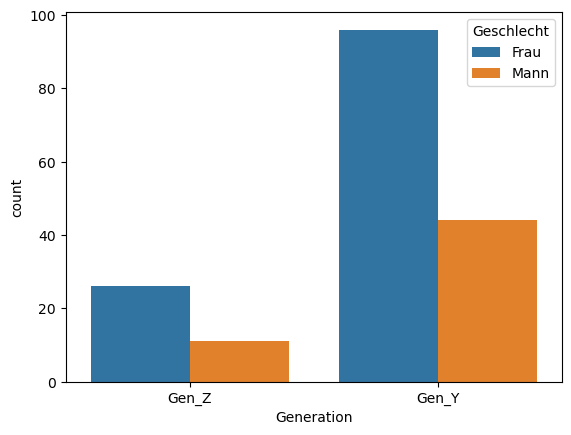

In [21]:
# Histogram Anzahl Generationen und Geschlecht
sns.countplot(df[['Geschlecht','Generation']], x = 'Generation', hue='Geschlecht')

In [22]:
df.loc[(df['Zeitmodell'] == 1),'Zeitmodell'] = 'Feste Arbeitszeiten'
df.loc[(df['Zeitmodell'] == 2),'Zeitmodell'] = 'Gleitzeit mit Kernarbeitszeit'
df.loc[(df['Zeitmodell'] == 3),'Zeitmodell'] = 'Gleitzeit ohne Kernarbeitszeit'
df.loc[(df['Zeitmodell'] == 4),'Zeitmodell'] = 'Schichtarbeit'
df.loc[(df['Zeitmodell'] == 5),'Zeitmodell'] = 'Vertrauensarbeitszeit ohne Kernarbeitszeit'
df.loc[(df['Zeitmodell'] == 6),'Zeitmodell'] = 'Vertrauensarbeitszeit mit Kernarbeitszeit'
df.loc[(df['Zeitmodell'] == 7),'Zeitmodell'] = 'Sonstiges'

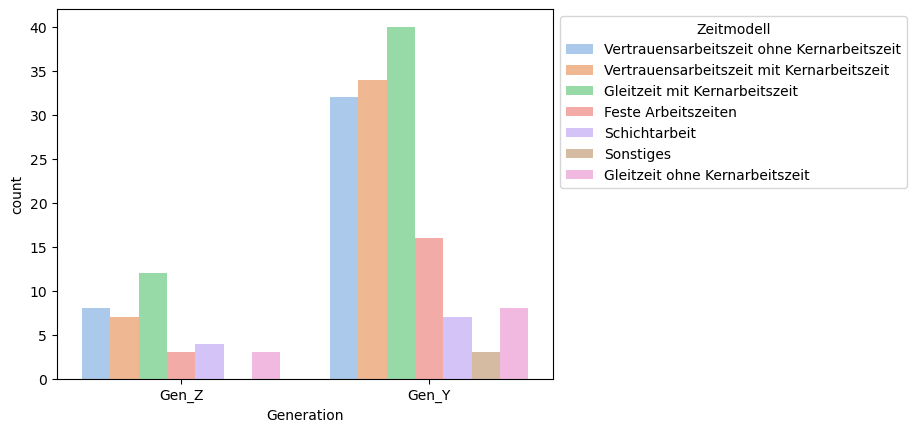

In [23]:
# Histogram absolute Zahlen Zeitmodell je Generation
ax=sns.countplot(df[['Zeitmodell','Generation']], x = 'Generation', hue='Zeitmodell', palette='pastel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))



In [24]:
data_plot = df[['Zeitmodell','Generation']].groupby('Generation')['Zeitmodell'].value_counts(normalize=True)
data_plot = data_plot.mul(100)
data_plot = data_plot.rename('percent').reset_index()
data_plot

,Generation,Zeitmodell,percent
0,Gen_Y,Gleitzeit mit Kernarbeitszeit,28.571429
1,Gen_Y,Vertrauensarbeitszeit mit Kernarbeitszeit,24.285714
2,Gen_Y,Vertrauensarbeitszeit ohne Kernarbeitszeit,22.857143
3,Gen_Y,Feste Arbeitszeiten,11.428571
4,Gen_Y,Gleitzeit ohne Kernarbeitszeit,5.714286
5,Gen_Y,Schichtarbeit,5.000000
6,Gen_Y,Sonstiges,2.142857
7,Gen_Z,Gleitzeit mit Kernarbeitszeit,32.432432
8,Gen_Z,Vertrauensarbeitszeit ohne Kernarbeitszeit,21.621622
9,Gen_Z,Vertrauensarbeitszeit mit Kernarbeitszeit,18.918919


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


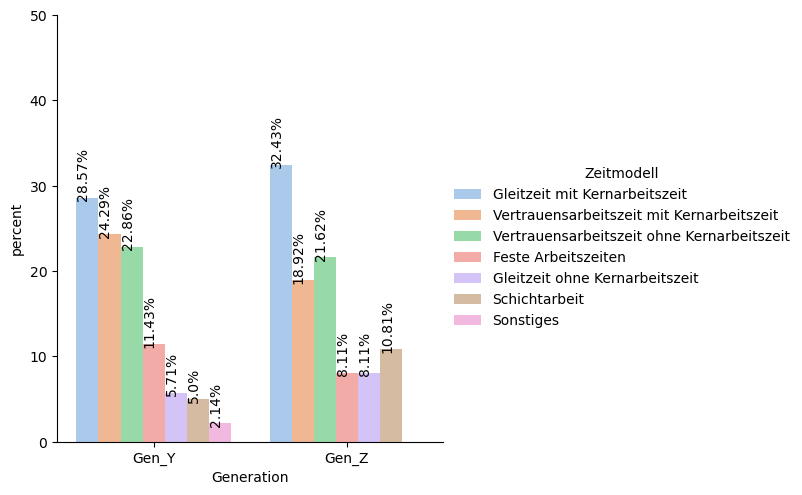

In [25]:
# Histogram prozentuale Zahlen Zeitmodell je Generation
g=sns.catplot(data = data_plot, x = 'Generation', y = 'percent' ,hue='Zeitmodell', kind='bar', palette='pastel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(.55, 1))
g.ax.set_ylim(0,50)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, rotation=90)

In [27]:
# Creating an interesting subset for plotting
sub = df[['MEAN_MO_1-17','SD10','SD11','MEAN_SD10-11','SD09','Bdauer','Arbeitsstunden','Geschlecht','Alter','Generation']]
sub

,MEAN_MO_1-17,SD10,SD11,MEAN_SD10-11,SD09,Bdauer,Arbeitsstunden,Geschlecht,Alter,Generation
0,5.588235,5,2,3.5,6,3,3,Frau,26,Gen_Z
1,4.941176,5,5,5.0,5,1,3,Frau,28,Gen_Y
2,3.764706,5,5,5.0,5,1,2,Frau,23,Gen_Z
3,3.882353,6,5,5.5,5,2,3,Frau,31,Gen_Y
4,5.411765,2,3,2.5,4,4,3,Frau,40,Gen_Y
...,...,...,...,...,...,...,...,...,...,...
172,5.294118,5,5,5.0,5,1,3,Mann,34,Gen_Y
173,2.647059,2,6,4.0,6,4,2,Frau,38,Gen_Y
174,3.411765,6,6,6.0,5,4,3,Frau,36,Gen_Y
175,4.764706,6,6,6.0,6,1,2,Frau,36,Gen_Y


In [28]:
# Aus neugier hier die Aufteilung in Gen Y and Z und männlich weiblich, dann Mittelwerte
# Beobachtung: Spannend, guck mal!
sub.groupby(['Generation','Geschlecht']).mean()

MEAN_MO_1-17      SD10      SD11  MEAN_SD10-11  \
Generation Geschlecht                                                   
Gen_Y      Frau            4.666667  3.687500  3.677083      3.682292   
           Mann            4.832888  4.636364  4.386364      4.511364   
Gen_Z      Frau            4.807692  4.076923  4.230769      4.153846   
           Mann            5.122995  3.818182  3.909091      3.863636   

                           SD09    Bdauer  Arbeitsstunden      Alter  
Generation Geschlecht                                                 
Gen_Y      Frau        4.427083  2.791667        2.895833  30.666667  
           Mann        4.704545  2.772727        3.045455  31.840909  
Gen_Z      Frau        4.615385  2.230769        2.692308  24.192308  
           Mann        4.454545  2.090909        3.000000  23.636364

In [34]:
# Wie kurz angesprochen sieht es Sinnvoll aus 4 Kategorien zu erstellen. 
# Gen_Z_Mann, Gen_Z_Frau, Gen_Y_Mann, Gen_Y_Frau

sub['Gen_Sex']=''
sub.loc[(sub['Generation'] == 'Gen_Z') & (sub['Geschlecht'] == 'Mann'),'Gen_Sex'] = 'Gen_Z_Mann'
sub.loc[(sub['Generation'] == 'Gen_Z') & (sub['Geschlecht'] == 'Frau'),'Gen_Sex'] = 'Gen_Z_Frau'
sub.loc[(sub['Generation'] == 'Gen_Y') & (sub['Geschlecht'] == 'Mann'),'Gen_Sex'] = 'Gen_Y_Mann'
sub.loc[(sub['Generation'] == 'Gen_Y') & (sub['Geschlecht'] == 'Frau'),'Gen_Sex'] = 'Gen_Y_Frau'


C:\Users\Lucas\AppData\Local\Temp\ipykernel_18380\2974762595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Gen_Sex']=''


In [35]:
sub

,MEAN_MO_1-17,SD10,SD11,MEAN_SD10-11,SD09,Bdauer,Arbeitsstunden,Geschlecht,Alter,Generation,Gen_Sex
0,5.588235,5,2,3.5,6,3,3,Frau,26,Gen_Z,Gen_Z_Frau
1,4.941176,5,5,5.0,5,1,3,Frau,28,Gen_Y,Gen_Y_Frau
2,3.764706,5,5,5.0,5,1,2,Frau,23,Gen_Z,Gen_Z_Frau
3,3.882353,6,5,5.5,5,2,3,Frau,31,Gen_Y,Gen_Y_Frau
4,5.411765,2,3,2.5,4,4,3,Frau,40,Gen_Y,Gen_Y_Frau
...,...,...,...,...,...,...,...,...,...,...,...
172,5.294118,5,5,5.0,5,1,3,Mann,34,Gen_Y,Gen_Y_Mann
173,2.647059,2,6,4.0,6,4,2,Frau,38,Gen_Y,Gen_Y_Frau
174,3.411765,6,6,6.0,5,4,3,Frau,36,Gen_Y,Gen_Y_Frau
175,4.764706,6,6,6.0,6,1,2,Frau,36,Gen_Y,Gen_Y_Frau


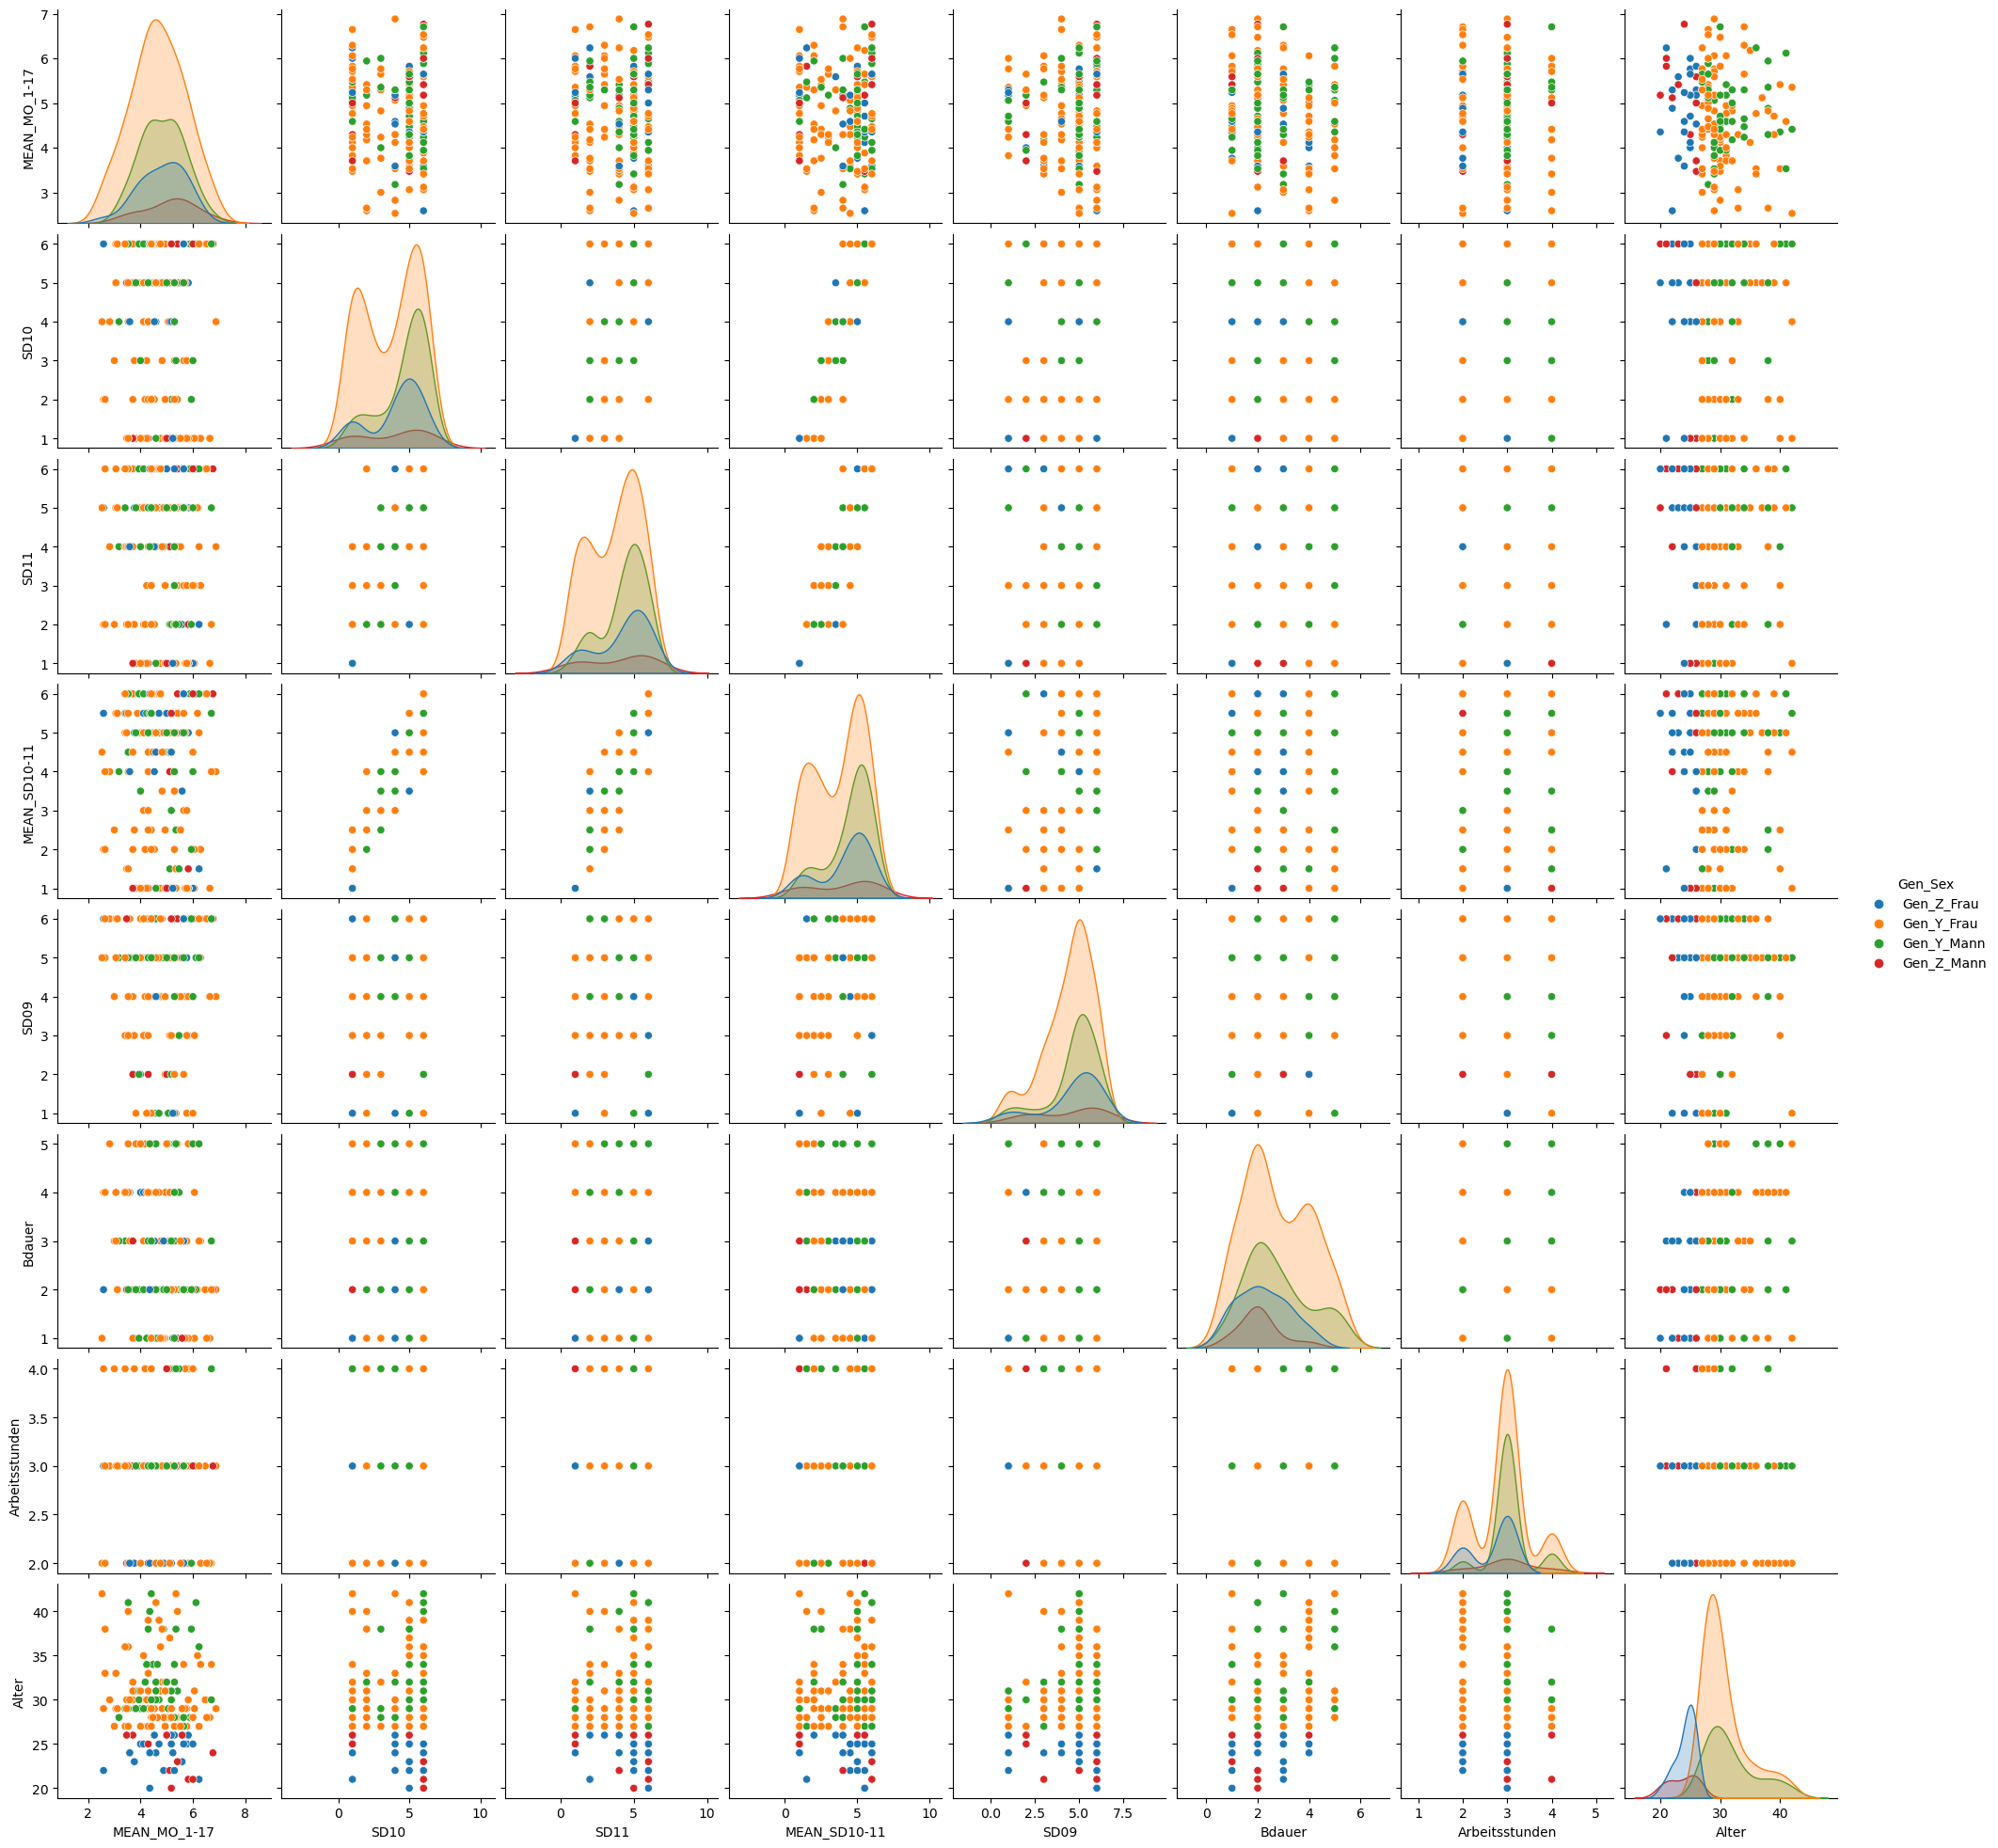

In [45]:
# Hier erkennt man wenig, außer an der Diagonalen, dass bei dir am meisten Frauen der Gen Y teilgenommen haben ;) 
# Beachte das bei Pairplots die Graphen an der Diagonalen Gespiegelt werden und auf der anderen Seite genauso nur um 90 Grad gedreht auftauchen.
sns.pairplot(data=sub, hue='Gen_Sex')

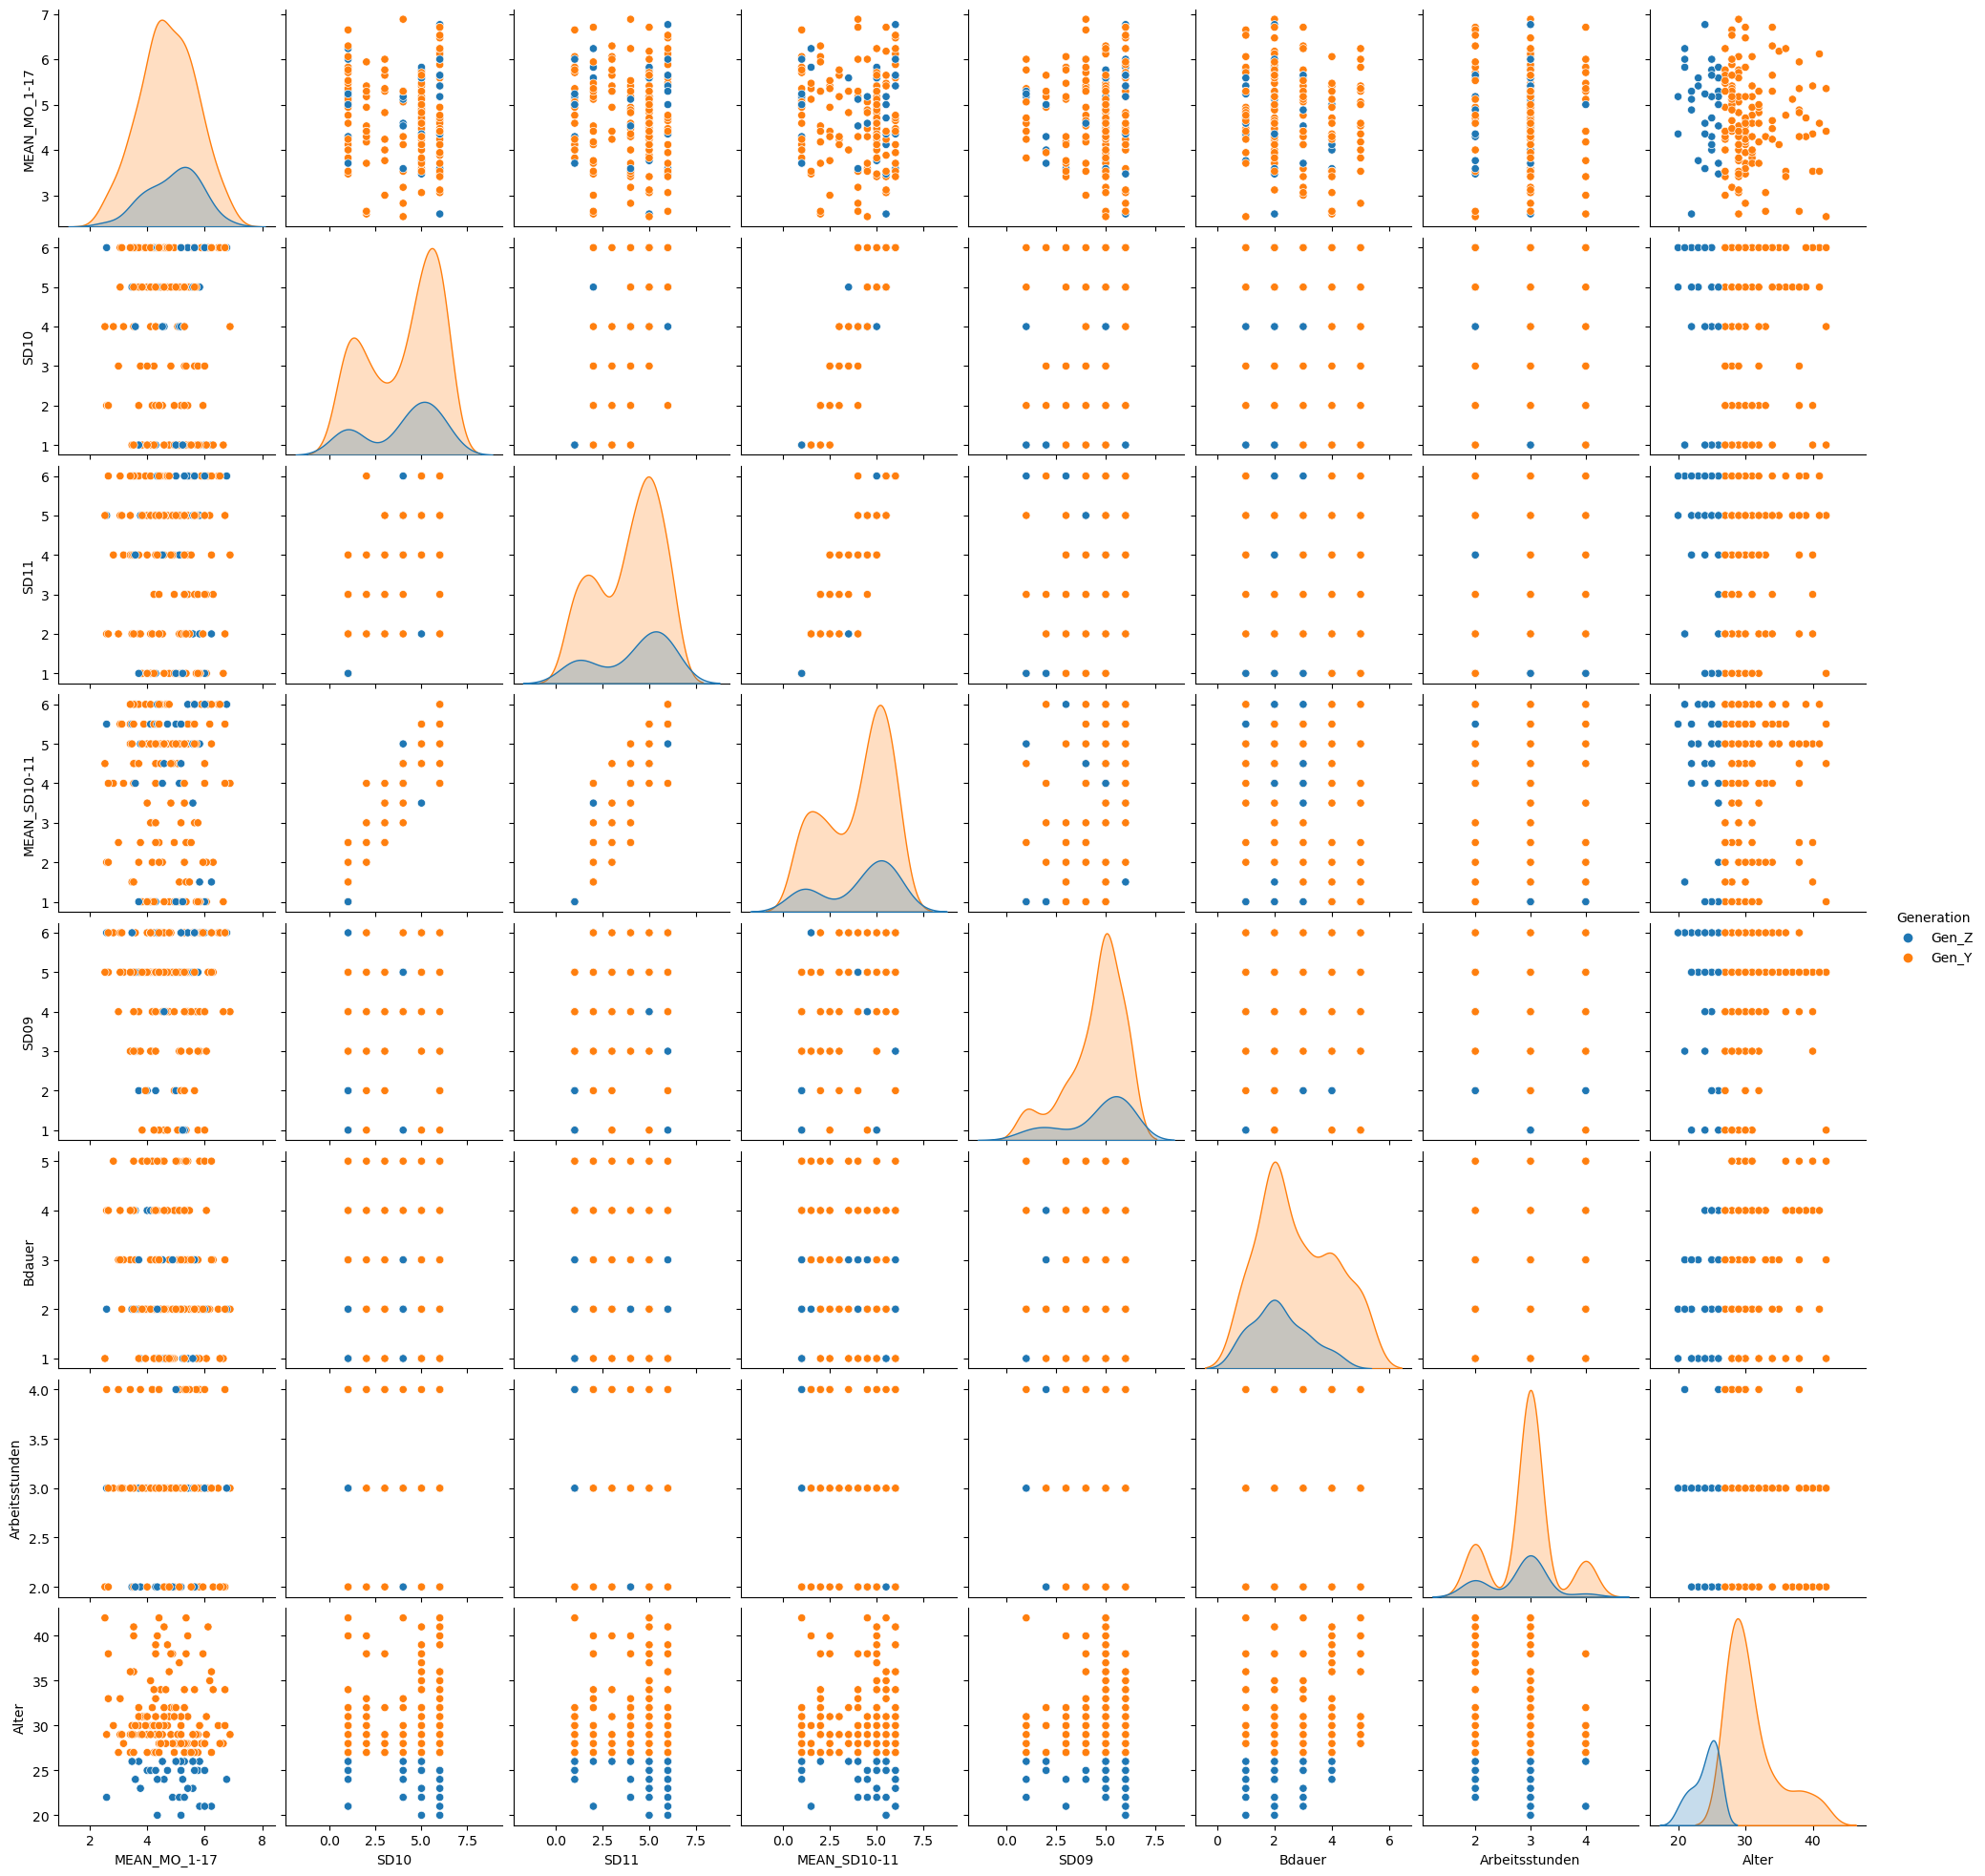

In [47]:
# Puh auch hier wenig zu erkennen auf Anhieb. Die Frequency Distributions (wie Histogramm nur als Linie) in der Mitte geben am meisten Auskunft.
#Gen Z ist leicht Motivierter (peakmehr rechts), bei den anderen Peaks ählich. Außer bei Arbeitsstunden, Gen Y arbeitet mehr.
sns.pairplot(data=sub, hue='Generation')

In [46]:
# Du hattest doch gesagt es ist fast gleich Aufgeteilt Gen Y und Gen Z? Sieht hier nicht so aus.
sub['Generation'].describe()

count       177
unique        2
top       Gen_Y
freq        140
Name: Generation, dtype: object

<Axes: xlabel='Generation', ylabel='Count'>

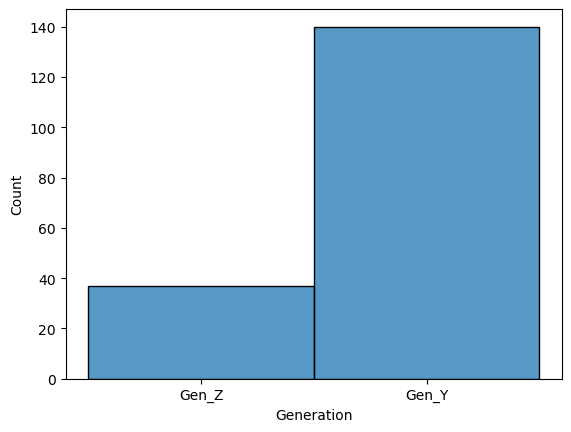

In [50]:
sns.histplot(df[['Generation']], x='Generation')

([<matplotlib.axis.XTick at 0x2382ee5c1c0>,
 [Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(30, 0, '30'),
  Text(32, 0, '32'),
  Text(34, 0, '34'),
  Text(36, 0, '36'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(44, 0, '44')])

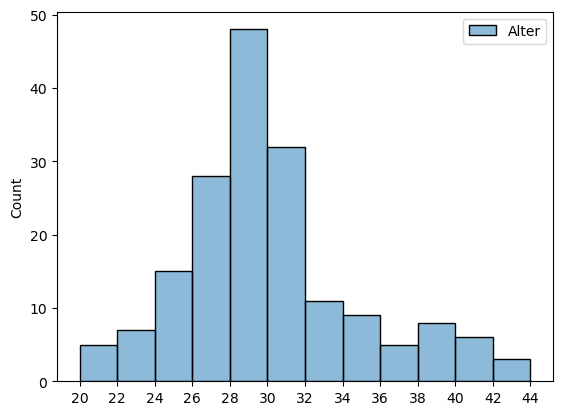

In [52]:
# Deine hier ist deine alters Distribution. Sie zeigt auch noch mal deinen viel höheren Anteil an Gen Y.
bins = np.arange(20, 46, 2)
sns.histplot(df[['Alter']], bins = bins)
plt.xticks(bins)

In [ ]:
# Eigentlich brauchst du mehr Daten für Gen Z

C:\Users\Lucas\AppData\Local\Temp\ipykernel_18380\3300160199.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(sub.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')


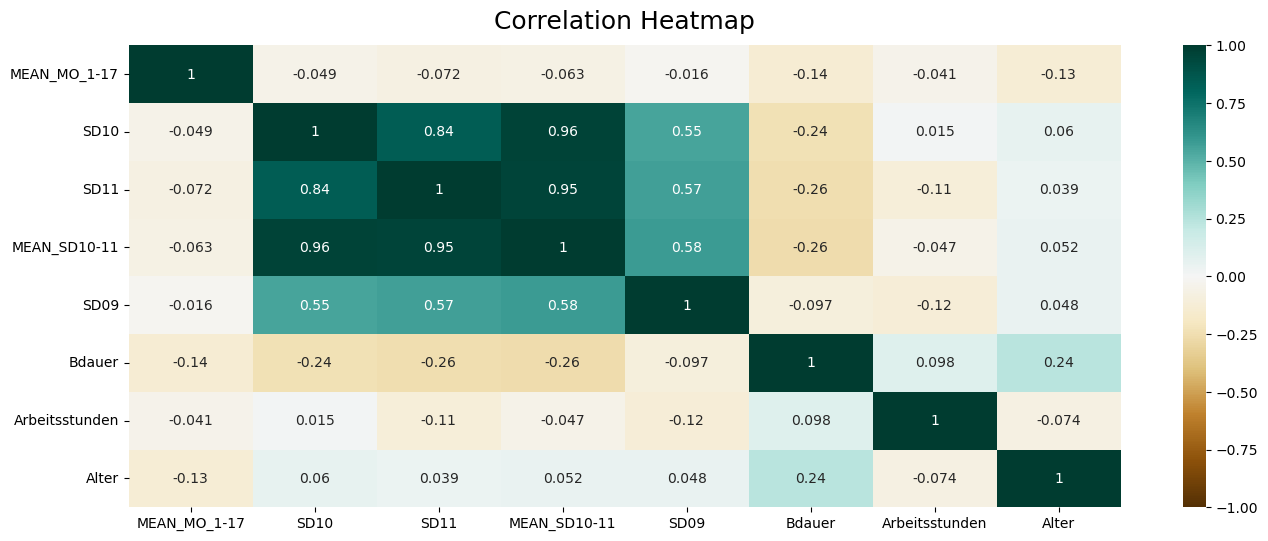

In [54]:
# Hier eine pearson correlation Hatmap. Uff problematisch. Keine Korrelation zu unseren Motivationsmittelwerten. Werte nah an Null.
# Einzige Korrelation bei SD09 Arbeitszeitflexibiltät und SD10, SD11, MEAN_SD10-11 Arbeitsortflexibilität
# Flexible Arbeitgeber bieten beides an.
# Auch hier Spiegelung an der Diagonalen

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(sub.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


In [59]:
# Ok letzter Act für heute. Noch mal alle Motivationswerte rein für die Heatmap.
sub1 = pd.concat([df.iloc[:,0:17],sub], axis=1)
sub1


,MO01,MO02,MO03,MO04,MO05,MO06,MO07,MO08,MO09,MO10,...,SD10,SD11,MEAN_SD10-11,SD09,Bdauer,Arbeitsstunden,Geschlecht,Alter,Generation,Gen_Sex
0,6,6,6,5,7,4,6,6,6,7,...,5,2,3.5,6,3,3,Frau,26,Gen_Z,Gen_Z_Frau
1,5,6,5,5,6,6,4,5,5,4,...,5,5,5.0,5,1,3,Frau,28,Gen_Y,Gen_Y_Frau
2,4,4,5,4,4,3,3,5,5,4,...,5,5,5.0,5,1,2,Frau,23,Gen_Z,Gen_Z_Frau
3,5,6,6,5,5,5,2,2,4,3,...,6,5,5.5,5,2,3,Frau,31,Gen_Y,Gen_Y_Frau
4,5,7,6,5,5,5,5,6,7,5,...,2,3,2.5,4,4,3,Frau,40,Gen_Y,Gen_Y_Frau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,6,5,5,5,5,6,6,6,6,...,5,5,5.0,5,1,3,Mann,34,Gen_Y,Gen_Y_Mann
173,3,2,4,2,2,2,1,1,1,2,...,2,6,4.0,6,4,2,Frau,38,Gen_Y,Gen_Y_Frau
174,3,3,3,3,3,3,2,3,6,4,...,6,6,6.0,5,4,3,Frau,36,Gen_Y,Gen_Y_Frau
175,3,5,6,5,5,3,6,5,5,5,...,6,6,6.0,6,1,2,Frau,36,Gen_Y,Gen_Y_Frau


C:\Users\Lucas\AppData\Local\Temp\ipykernel_18380\3531465348.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(sub1.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')


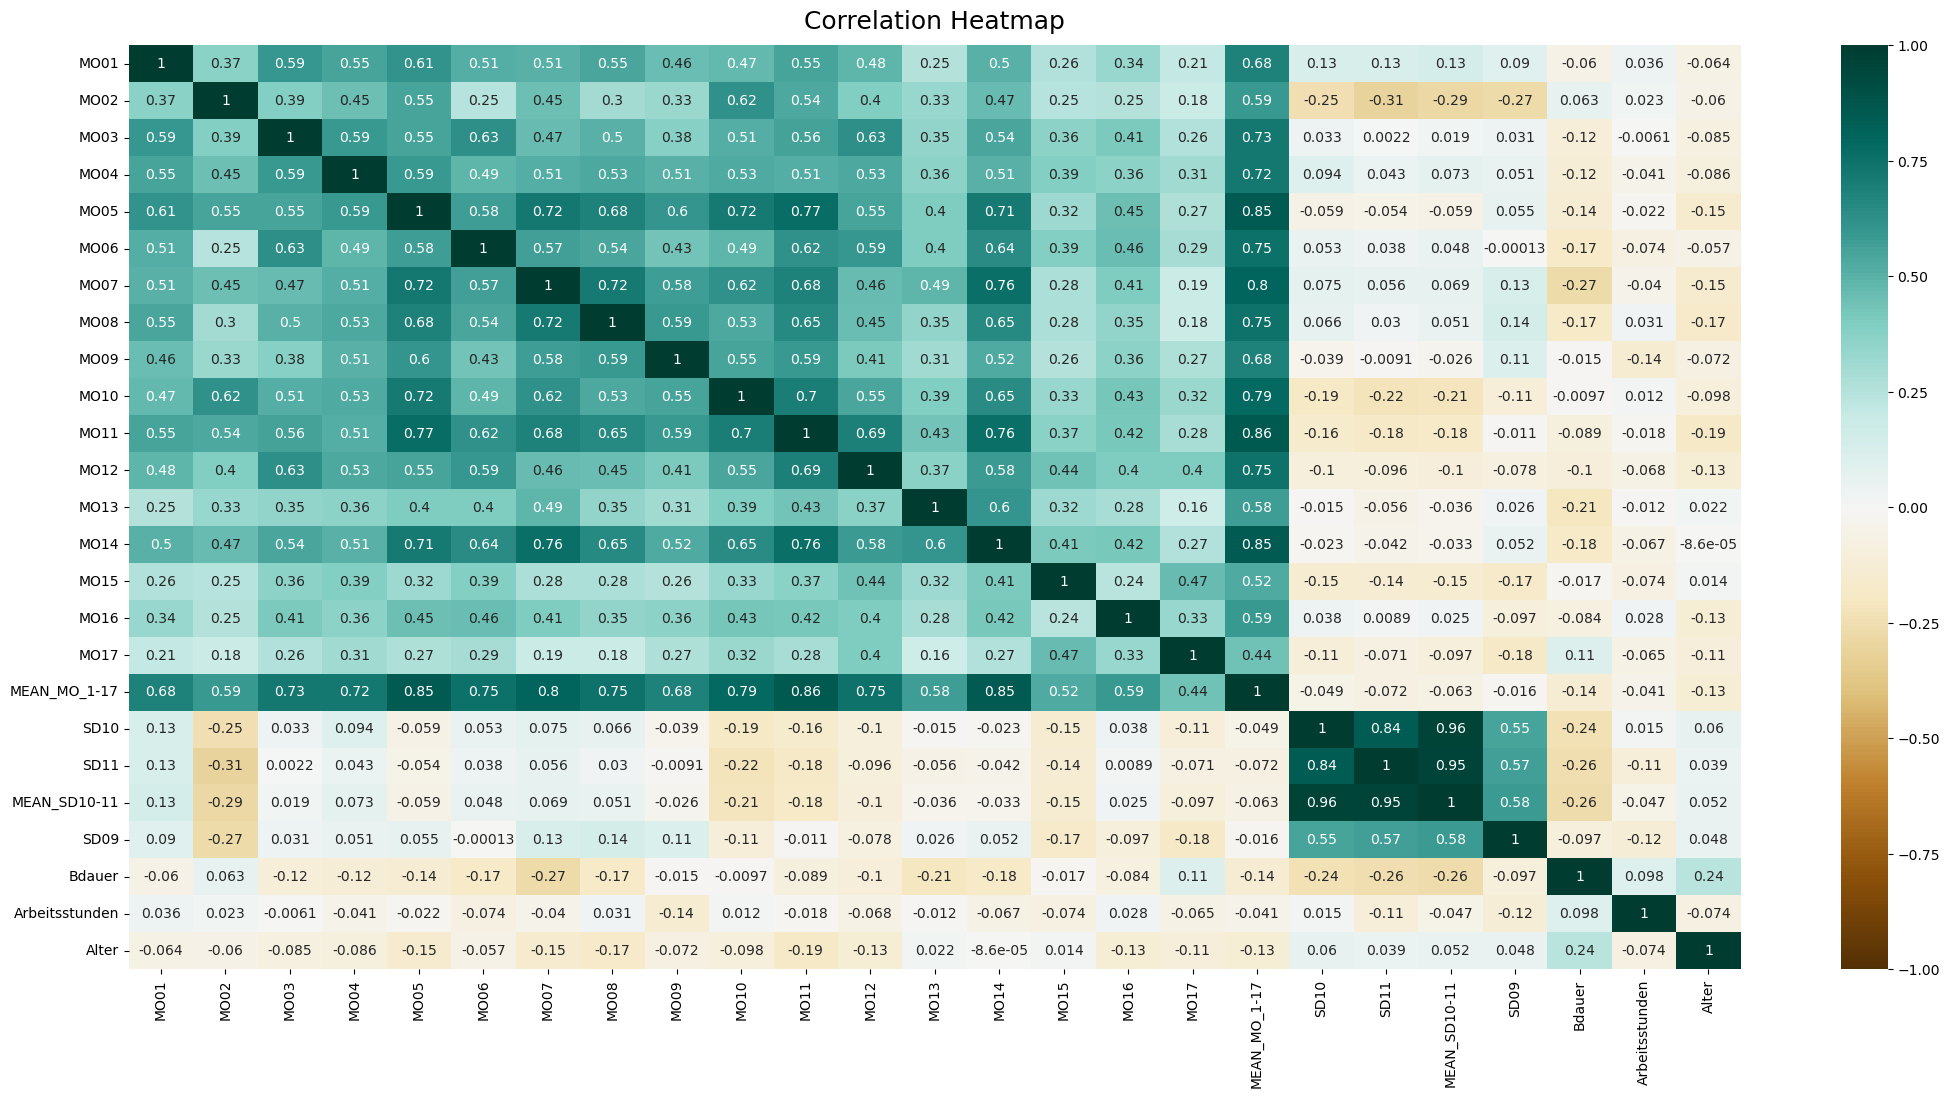

In [61]:
# Große Heatmap mit allen Werten
plt.figure(figsize=(26, 12))
heatmap = sns.heatmap(sub1.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [62]:
# Hier die beiden Subsets die ich am Ende gemacht hab
sub.to_csv('small_mean_subset.csv')
sub1.to_csv('big_subset_all_motiv.csv')


In [64]:
# Der große Anfangsdatensatz mit den Metriken (z.B Mean) die ich hinzugefügt habe.
df.to_csv('all_data.csv')

In [69]:
# Und weil du dir das gewünscht hast noch mal die zwei Datensätze jeweils getrennt nach Generation. 
Gen_Z = df[df['Generation']== 'Gen_Z']
Gen_Z.reset_index(inplace=True)
Gen_Z.to_csv('Gen_Z.csv')

Gen_Y = df[df['Generation']== 'Gen_Y']
Gen_Y.reset_index(inplace=True)
Gen_Y.to_csv('Gen_Y.csv')

In [67]:
df

,MO01,MO02,MO03,MO04,MO05,MO06,MO07,MO08,MO09,MO10,...,SD19_03,SD19_04,SD19_05,SD19_07,SD19_06,TIME_RSI,DEG_TIME,MEAN_MO_1-17,MEAN_SD10-11,Generation
0,6,6,6,5,7,4,6,6,6,7,...,F,T,T,F,T,"1,25",18,5.588235,3.5,Gen_Z
1,5,6,5,5,6,6,4,5,5,4,...,F,F,F,F,F,"1,53",27,4.941176,5.0,Gen_Y
2,4,4,5,4,4,3,3,5,5,4,...,F,T,T,F,F,"0,84",1,3.764706,5.0,Gen_Z
3,5,6,6,5,5,5,2,2,4,3,...,F,T,F,F,F,"0,58",1,3.882353,5.5,Gen_Y
4,5,7,6,5,5,5,5,6,7,5,...,F,T,F,F,F,"1,02",8,5.411765,2.5,Gen_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,6,5,5,5,5,6,6,6,6,...,F,F,F,F,F,"1,05",11,5.294118,5.0,Gen_Y
173,3,2,4,2,2,2,1,1,1,2,...,F,F,F,T,F,"0,94",5,2.647059,4.0,Gen_Y
174,3,3,3,3,3,3,2,3,6,4,...,F,T,T,F,F,"0,98",3,3.411765,6.0,Gen_Y
175,3,5,6,5,5,3,6,5,5,5,...,F,F,T,F,F,"0,96",4,4.764706,6.0,Gen_Y
